In [2]:
from deeplift.visualization import viz_sequence
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
default_colors = {0:'green', 1:'blue', 2:'orange', 3:'red'}
default_plot_funcs = {0:viz_sequence.plot_a, 1:viz_sequence.plot_c, 2:viz_sequence.plot_g, 3:viz_sequence.plot_t}

In [4]:
def plot_weights_given_ax(ax, array,
                 pos_height,
                 neg_height,
                 length_padding,
                 subticks_frequency,
                 highlight,
                 colors=default_colors,
                 plot_funcs=default_plot_funcs):
    if len(array.shape)==3:
        array = np.squeeze(array)
    assert len(array.shape)==2, array.shape
    if (array.shape[0]==4 and array.shape[1] != 4):
        array = array.transpose(1,0)
    assert array.shape[1]==4
    max_pos_height = 0.0
    min_neg_height = 0.0
    heights_at_positions = []
    depths_at_positions = []
    for i in range(array.shape[0]):
        #sort from smallest to highest magnitude
        acgt_vals = sorted(enumerate(array[i,:]), key=lambda x: abs(x[1]))
        positive_height_so_far = 0.0
        negative_height_so_far = 0.0
        for letter in acgt_vals:
            plot_func = plot_funcs[letter[0]]
            color=colors[letter[0]]
            if (letter[1] > 0):
                height_so_far = positive_height_so_far
                positive_height_so_far += letter[1]                
            else:
                height_so_far = negative_height_so_far
                negative_height_so_far += letter[1]
            plot_func(ax=ax, base=height_so_far, left_edge=i, height=letter[1], color=color)
        max_pos_height = max(max_pos_height, positive_height_so_far)
        min_neg_height = min(min_neg_height, negative_height_so_far)
        heights_at_positions.append(positive_height_so_far)
        depths_at_positions.append(negative_height_so_far)

    #now highlight any desired positions; the key of
    #the highlight dict should be the color
    for color in highlight:
        for start_pos, end_pos in highlight[color]:
            assert start_pos >= 0.0 and end_pos <= array.shape[0]
            min_depth = np.min(depths_at_positions[start_pos:end_pos])
            max_height = np.max(heights_at_positions[start_pos:end_pos])
            ax.add_patch(
                matplotlib.patches.Rectangle(xy=[start_pos,min_depth],
                    width=end_pos-start_pos,
                    height=max_height-min_depth,
                    edgecolor=color, fill=False))

    ax.set_xlim(-length_padding, array.shape[0]+length_padding)
    ax.xaxis.set_ticks(np.arange(0.0, array.shape[0]+1, subticks_frequency))
    ax.set_ylim(neg_height, pos_height)

def plot_weights(array,
                 figsize=(20,2),
                 pos_height=1.0,
                 neg_height=-1.0,
                 length_padding=1.0,
                 subticks_frequency=1.0,
                 colors=default_colors,
                 plot_funcs=default_plot_funcs,
                 highlight={}):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111) 
    plot_weights_given_ax(ax=ax, array=array,
        pos_height=pos_height,
        neg_height=neg_height,
        length_padding=length_padding,
        subticks_frequency=subticks_frequency,
        colors=colors,
        plot_funcs=plot_funcs,
        highlight=highlight)

In [5]:
server="cbsu"
path="/home2/ayh8/attribution_scores/examples"
fp="folds_qtl_examples_profile.npz"
scratch="/Users/adamhe/github/scratch"

print(f"scp {server}:{os.path.join(path, fp)} {scratch}")

scp cbsu:/home2/ayh8/attribution_scores/examples/folds_qtl_examples_profile.npz /Users/adamhe/github/scratch


In [7]:
ensemble_deepshap = np.load(os.path.join(scratch, fp))
mean_shap = np.array([ensemble_deepshap[fold] for fold in ensemble_deepshap.files]).mean(axis=0)


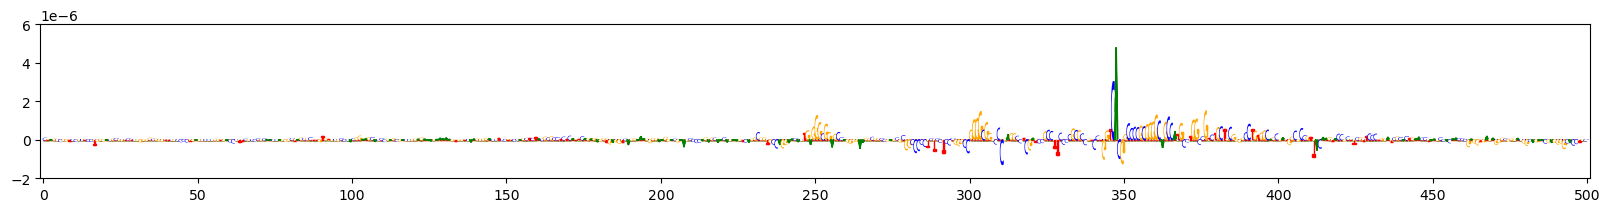

In [14]:
plot_weights(mean_shap[0, :, 250:750], neg_height=-2e-6, pos_height=6e-6, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs185220G.pdf")

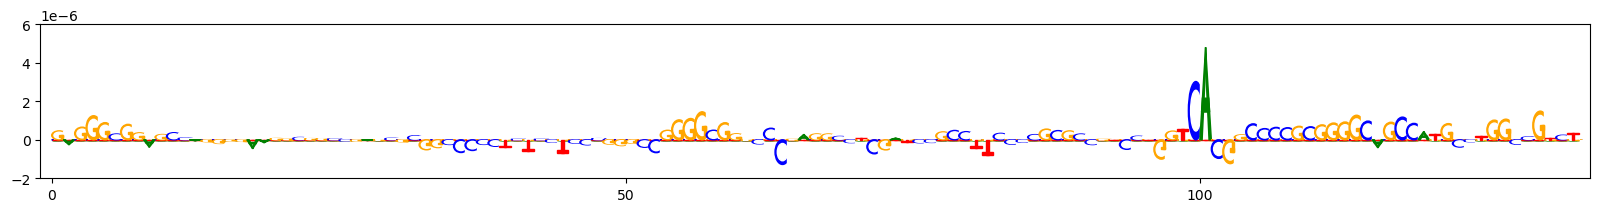

In [15]:
plot_weights(mean_shap[0, :, 497:630], neg_height=-2e-6, pos_height=6e-6, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs185220G_inset.pdf")

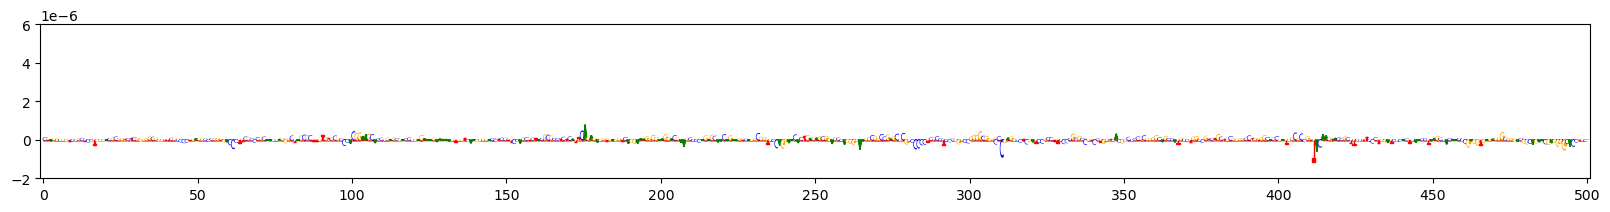

In [17]:
plot_weights(mean_shap[1, :, 250:750], neg_height=-2e-6, pos_height=6e-6, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs185220A.pdf")

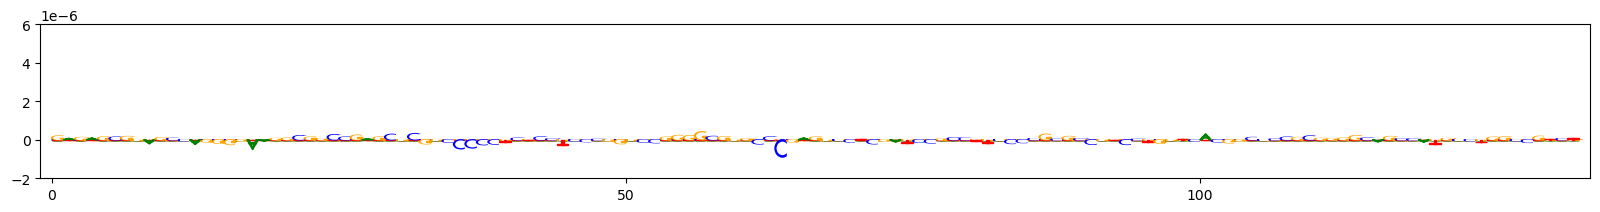

In [19]:
plot_weights(mean_shap[1, :, 497:630], neg_height=-2e-6, pos_height=6e-6, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs185220A_inset.pdf")

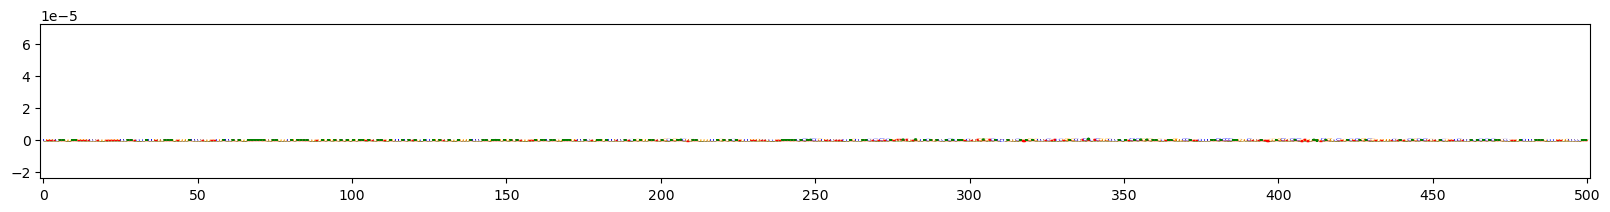

In [32]:
plot_weights(mean_shap[2, :, 250:750], neg_height=-2.4e-5, pos_height=7.2e-5, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs8050061C.pdf")

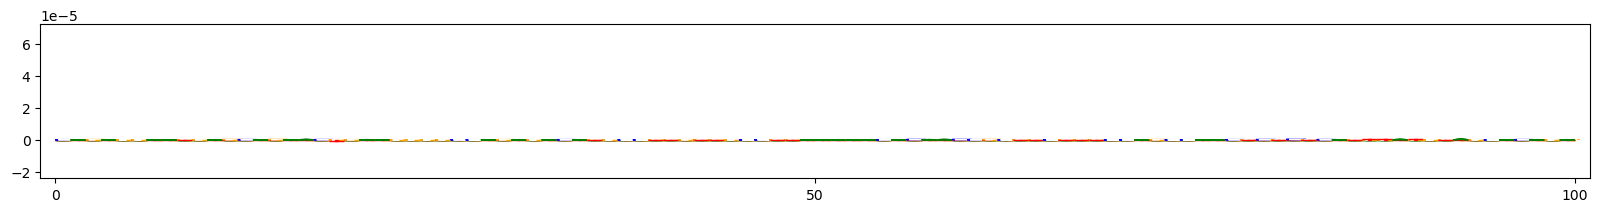

In [31]:
plot_weights(mean_shap[2, :, 440:540], neg_height=-2.4e-5, pos_height=7.2e-5, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs8050061C_inset.pdf")

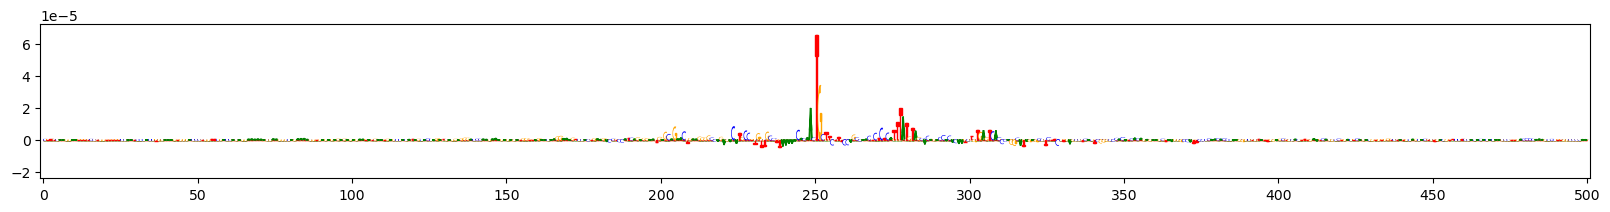

In [29]:
plot_weights(mean_shap[3, :, 250:750], neg_height=-2.4e-5, pos_height=7.2e-5, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs8050061T.pdf")

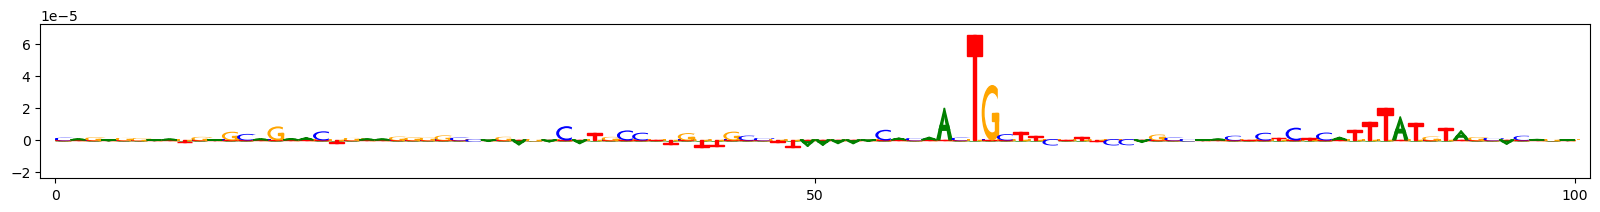

In [30]:
plot_weights(mean_shap[3, :, 440:540], neg_height=-2.4e-5, pos_height=7.2e-5, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs8050061T_inset.pdf")

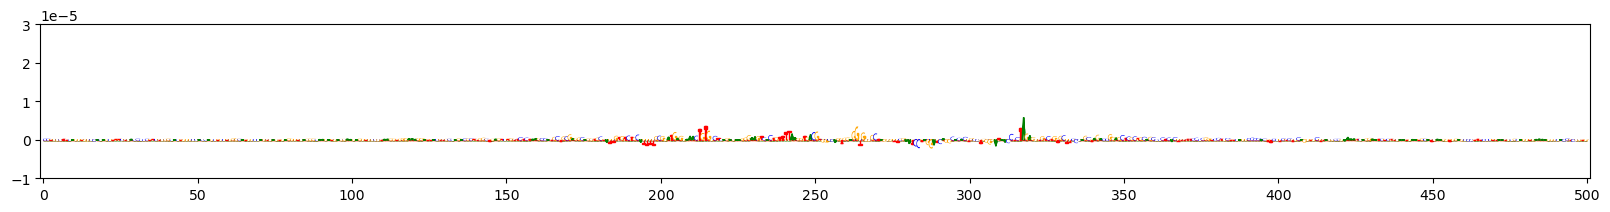

In [37]:
plot_weights(mean_shap[4, :, 250:750], neg_height=-1e-5, pos_height=3e-5, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs1016110C.pdf")

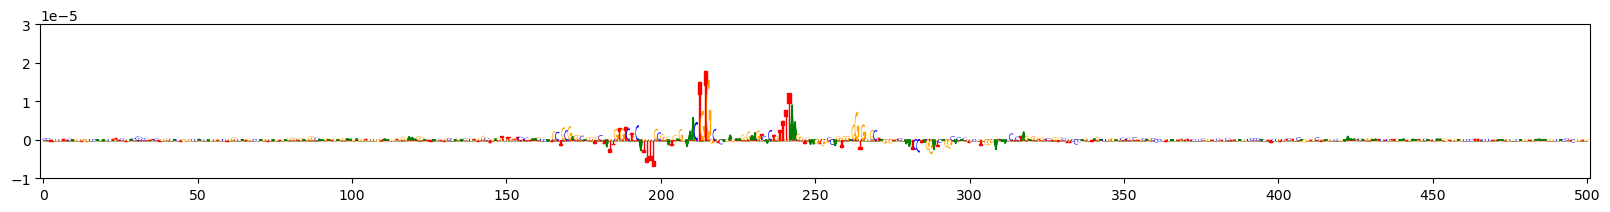

In [36]:
plot_weights(mean_shap[5, :, 250:750], neg_height=-1e-5, pos_height=3e-5, subticks_frequency=50)
plt.savefig("ensemble_deepshap_rs1016110T.pdf")

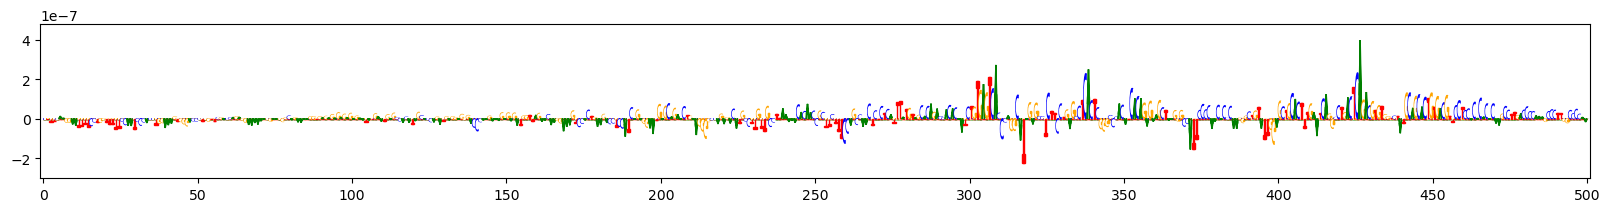

In [8]:
viz_sequence.plot_weights(mean_shap[2, :, 250:750], subticks_frequency=50)